In [63]:
import torch
import torchvision
import matplotlib
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tqdm
import time

In [64]:
transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])
mnist_train = torchvision.datasets.MNIST('./data', train=True, download=True, transform=transform)
mnist_val = torchvision.datasets.MNIST('./data', train=False, download=True, transform=transform)

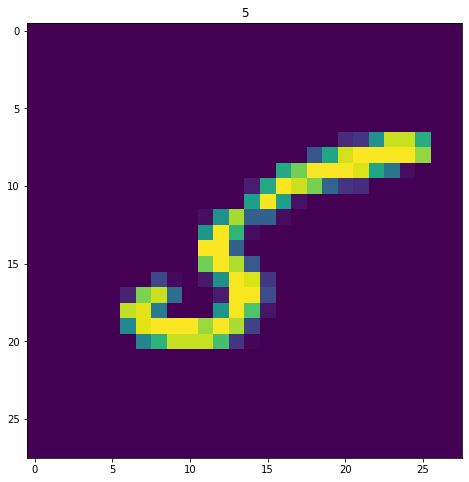

In [65]:
# plot image
img = mnist_train[11][0]
label = mnist_train[11][1]
plt.imshow(img.reshape(28,28))
plt.title(label)
plt.show()

In [66]:
# dataloader
batch_size = 1024
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=1)
val_loader = torch.utils.data.DataLoader(mnist_val,batch_size=batch_size,shuffle=False,num_workers=1)

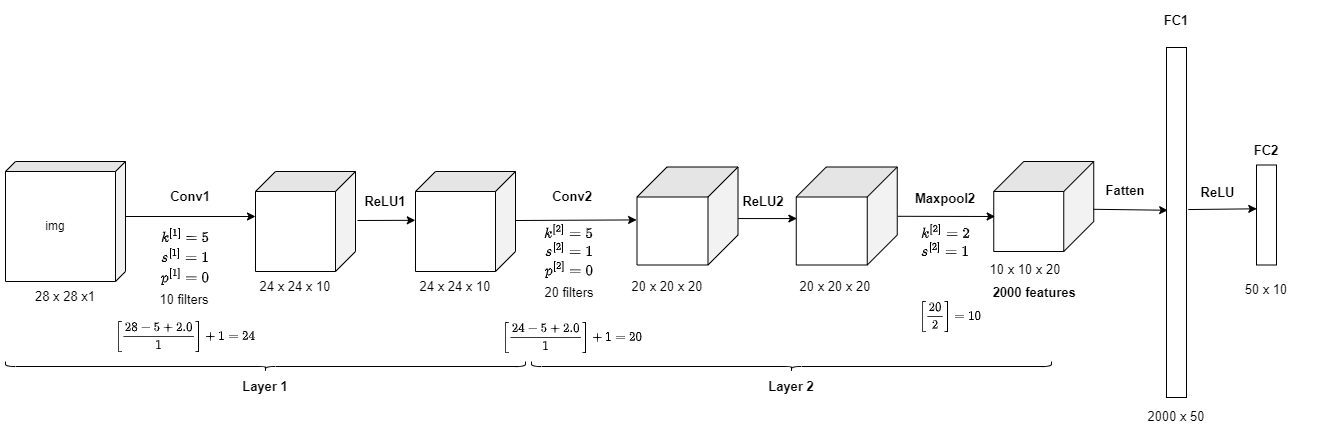

In [67]:
# CNN Network
class CNN_Model(torch.nn.Module):
  def __init__(self):
    super().__init__()
    #layer 1
    self.conv1 = torch.nn.Conv2d(1,10,kernel_size=5)
    self.relu1 = torch.nn.ReLU()
    #layer 2
    self.conv2 = torch.nn.Conv2d(10,20,kernel_size=5)
    self.relu2 = torch.nn.ReLU()
    self.maxpool2 = torch.nn.MaxPool2d(2)
    #Fully connection Neural Network
    self.fc1 = torch.nn.Linear(2000,50)
    self.fc2 = torch.nn.Linear(50,10)

  def forward(self,x):
    x = self.conv1(x)
    x = self.relu1(x)
    x = self.conv2(x)
    x = self.relu2(x)
    x = self.maxpool2(x)
    # Flatten
    x = x.view(-1,2000)
    x = self.fc1(x)
    x = torch.nn.functional.relu(x)
    x = self.fc2(x)
    return x
# Create an instance of the model
net = CNN_Model()
# Loss Funtion
criterion = torch.nn.CrossEntropyLoss()
# Optimizer
optimizer = torch.optim.SGD(net.parameters(),lr=0.01,momentum=0.9)

In [68]:
# Training loop
epochs = 15
train_loss = []
val_loss = []
train_acc = []
val_acc = []

for epoch in tqdm(range(epochs),desc='Progress Bar'):
  time.sleep(0)
  # Training set
  net.train()
  epoch_loss = 0
  correct = 0
  iter = 0
  for i,(input,target) in enumerate(train_loader):
    optimizer.zero_grad()
    #feedforward
    output = net(input)
    loss = criterion(output,target)
    epoch_loss += loss.item()
    #backward
    loss.backward()
    #adjust weight
    optimizer.step()
    #predict
    _,predict = torch.max(output.data,1)
    correct += (predict == target.data).sum()
    iter += 1
  #Train loss
  train_loss.append(epoch_loss/iter)
  #Train accuracy
  train_acc.append(correct*100/len(train_loader.dataset))

  #Validation set
  net.eval()
  epoch_loss = 0
  correct = 0
  iter = 0
  for i,(input,target) in enumerate(val_loader):
    #Forward
    output = net(input)
    loss = criterion(output, target)
    epoch_loss += loss.item()
    #predict
    _,predict = torch.max(output.data,1)
    correct += (predict == target.data).sum()
    iter += 1
  #Val loss
  val_loss.append(epoch_loss/iter)
  #val accuracy
  val_acc.append(correct*100/len(val_loader.dataset))

  print('Epoch %d/%d: Train loss: %.4f, Train Acc:%.4f, Val loss: %.4f, Val Acc:%.4f'%(epoch+1, epochs,train_loss[-1],train_acc[-1],val_loss[-1],val_acc[-1]))

torch.save(net.state_dict(),'./net-weight.pt')

Progress Bar:   0%|          | 0/15 [00:00<?, ?it/s]

Epoch 1/15: Train loss: 1.3300, Train Acc:60.5867, Val loss: 0.4122, Val Acc:87.8000
Epoch 2/15: Train loss: 0.3519, Train Acc:89.4833, Val loss: 0.3032, Val Acc:90.8100
Epoch 3/15: Train loss: 0.2721, Train Acc:91.9033, Val loss: 0.2477, Val Acc:92.6000
Epoch 4/15: Train loss: 0.2208, Train Acc:93.3700, Val loss: 0.1918, Val Acc:94.1500
Epoch 5/15: Train loss: 0.1929, Train Acc:94.2550, Val loss: 0.1704, Val Acc:94.9400
Epoch 6/15: Train loss: 0.1706, Train Acc:94.8250, Val loss: 0.1617, Val Acc:95.4000
Epoch 7/15: Train loss: 0.1498, Train Acc:95.4700, Val loss: 0.1337, Val Acc:95.8700
Epoch 8/15: Train loss: 0.1340, Train Acc:95.8983, Val loss: 0.1266, Val Acc:96.0200
Epoch 9/15: Train loss: 0.1209, Train Acc:96.4283, Val loss: 0.1151, Val Acc:96.6100
Epoch 10/15: Train loss: 0.1133, Train Acc:96.5633, Val loss: 0.1077, Val Acc:96.7200
Epoch 11/15: Train loss: 0.1036, Train Acc:96.8750, Val loss: 0.1051, Val Acc:96.8500
Epoch 12/15: Train loss: 0.0950, Train Acc:97.1933, Val loss: 0

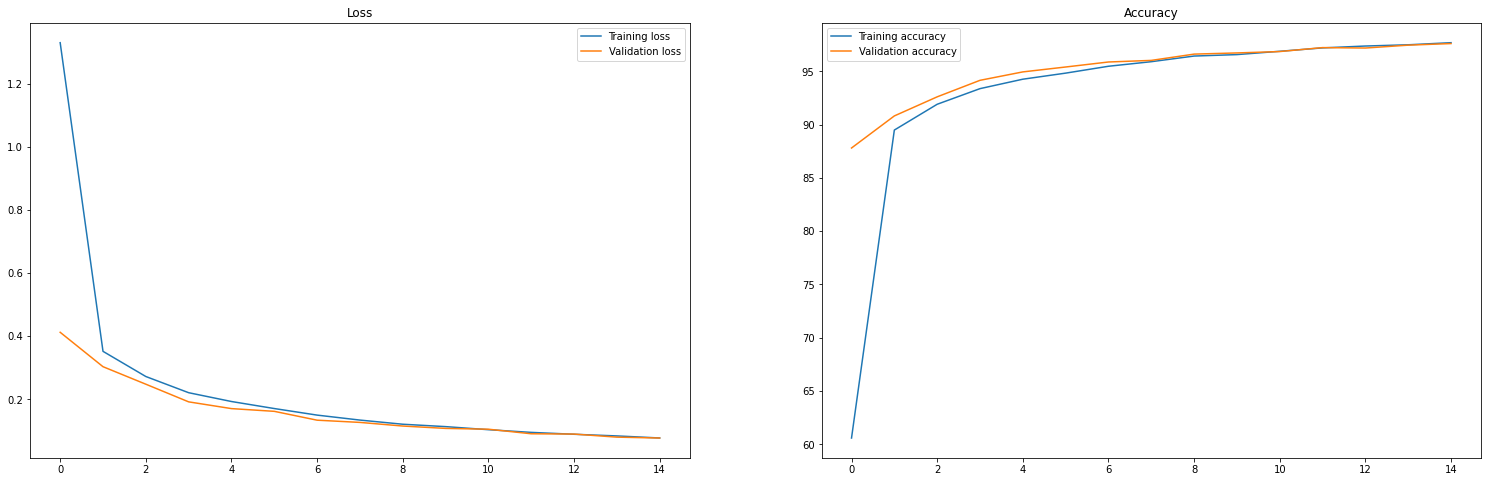

In [69]:
# Plot Loss and Accuracy
matplotlib.rcParams['figure.figsize'] = [26,8]
fig,(ax1,ax2) = plt.subplots(1,2)

# Loss
ax1.set_title('Loss')
ax1.plot(train_loss,label='Training loss')
ax1.plot(val_loss,label='Validation loss')
ax1.legend()

# Accuracy
ax2.set_title('Accuracy')
ax2.plot(train_acc,label='Training accuracy')
ax2.plot(val_acc,label='Validation accuracy')
ax2.legend()


plt.show()

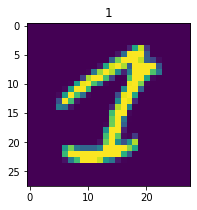

Handwritten Digit is: 3


In [78]:
# Make predict
img_index = 224
img = mnist_train[img_index][0]
label = mnist_train[img_index][1]

plt.figure(figsize=(3,3))
plt.imshow(img.reshape(28,28))
plt.title(label)
plt.show()

output = net(img)
_,predict = torch.max(output.data,1)
print('Handwritten Digit is:',predict.item())